In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('dataset/Online Retail Data Set.csv', encoding='unicode_escape')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [6]:
daily_orders = data.groupby('InvoiceDate')['Quantity'].sum().reset_index()
high_order_days = daily_orders[daily_orders['Quantity'] > 50]


In [7]:
num_high_order_days = high_order_days.shape[0]
total_days = daily_orders.shape[0]

print(f"High order days: {num_high_order_days}")
print(f"Total days: {total_days}")

High order days: 15383
Total days: 23260


In [8]:
n = total_days
p = num_high_order_days / total_days

k = num_high_order_days 
probability = binom.pmf(k, n, p)

print(f"Binomial probability of having {k} high-order days: {probability*100:.2f}%")

Binomial probability of having 15383 high-order days: 0.55%


In [9]:
k_values = np.arange(0, n + 1)
pmf_values = binom.pmf(k_values, n, p)

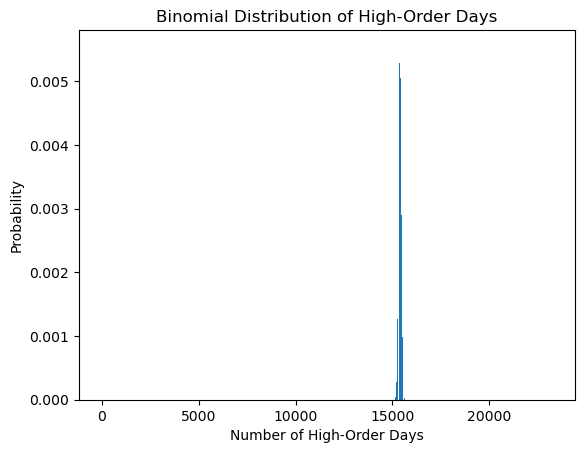

In [11]:
plt.bar(k_values, pmf_values)
plt.title('Binomial Distribution of High-Order Days')
plt.xlabel('Number of High-Order Days')
plt.ylabel('Probability')
plt.show()
